### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [28]:
#loading ggplot2
library(ggplot2)

In [29]:
#loading lubridate 
library(lubridate)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [44]:
# loading dplyr
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [1]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [2]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [3]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [4]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


## Data Manipulation and Cleaning
Here we are cleaning and manipulating data to make it easier in the long run to compair all three cities. 

In [18]:
# Creating null columns of 'Gender' and 'Birth.Year' in the Washington dataset to be able to concatenate all
wash$Gender <- NA 
wash$Birth.Year <-NA


In [19]:
# Adding a new column 'City' to each dataset to retain info about city after concatenation
ny$City <- 'New York City'
wash$City <- 'Washington'
chi$City <- 'Chicago'

In [21]:

# Concatenating all three datasets together as "city"
city <- rbind(ny,wash)     
city <- rbind(city,chi)    
head(city)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,New York City
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,New York City
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,New York City
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,New York City
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,New York City
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,New York City


### Question 1


What are the counts of each gender? (only available for NYC and Chicago)

In [22]:
#combining NY and Chicago
NY_and_Chicago <- rbind(ny, chi)

In [31]:
#count of male and female users in chicago
gender_Chi <- sort(table(NY_and_Chicago$Gender[NY_and_Chicago$City == 'Chicago']))
print (gender_Chi)


Female          Male 
  1723   1748   5159 


In [32]:
#count of male and female users in chicago
gender_NY <- sort(table(NY_and_Chicago$Gender[NY_and_Chicago$City == 'New York City']))
print (gender_NY)


       Female   Male 
  5410  12159  37201 


In [24]:
# Count of Gender (Male and Female)
total = sort(table(NY_and_Chicago$Gender))
print(total)   


       Female   Male 
  7158  13882  42360 


In [25]:
# percentage of Gender (Male and Female)
round((total / length(NY_and_Chicago$Gender) * 100), digits = 2)
  


       Female   Male 
 11.29  21.90  66.81 

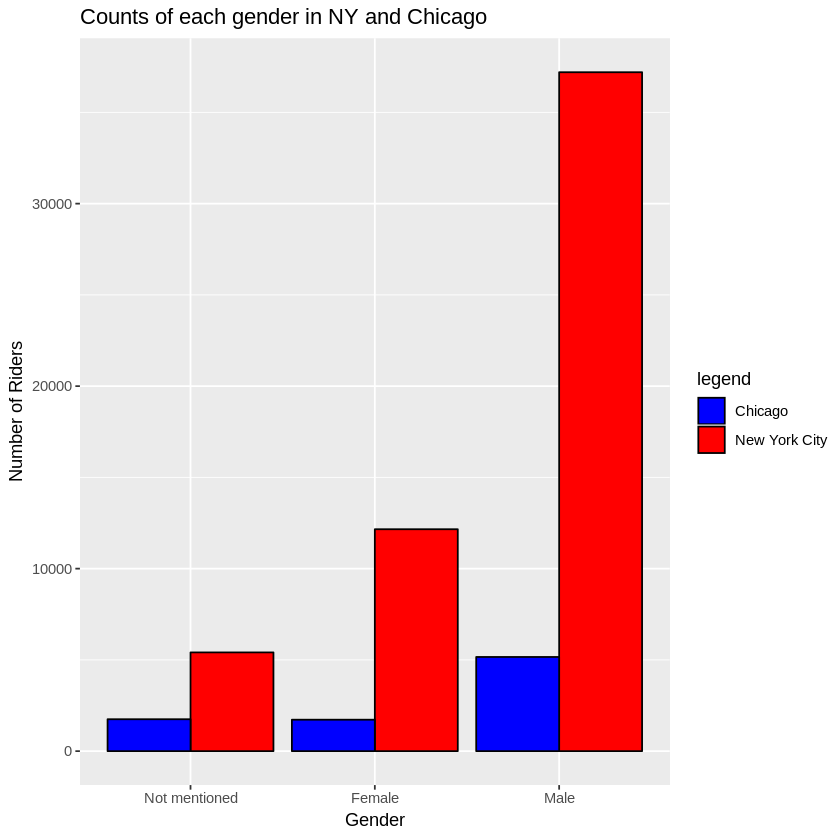

In [30]:
# Visualizing data with ggplot
ggplot(aes(x = Gender, fill = City), data = NY_and_Chicago) +
    geom_bar(position = 'dodge', colour="black") +
    ggtitle('Counts of each gender in NY and Chicago') +
    scale_x_discrete(labels = c('Not mentioned', 'Female', 'Male')) +
    labs(y = 'Number of Riders', x = 'Gender') +
    scale_fill_manual("legend", values = c("Chicago" = "blue", "New York City" = "red"))

**Summary**
Due to Washinton not providing information about gender, we only can answer this question using Chicago and NY. 
When combining the cities, there are 66.81% of the users while the females are 21.90% of their users. This pattern continues for the cities seperatly, having the a larger male user base. This can be seen using the graph above. 
In NYC the males make up about 67.92% of the users, while the females make up 22.20%. There "Not Mentioned" users that do not share this data that make up 9.88% of the users. 
In Chicago  the males make up about 59.78% of the users, while the females make up 19.97%. The "Not Mentioned" users make up 20.25% of the users. 
This means that there are more male than female users in both NYC and Chicago. 


### Question 2

What is the most common month to travel?

In [38]:
# reformat the start time column and create a month coumn for that
city$Start.Time <- as.Date(city$Start.Time)
city$FormattedMonth <- format(city$Start.Time, "%m")
head(city)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City,FormattedMonth
5688089,2017-06-11,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,New York City,06
4096714,2017-05-11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,New York City,05
2173887,2017-03-29,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,New York City,03
3945638,2017-05-08,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,New York City,05
6208972,2017-06-21,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,New York City,06
1285652,2017-02-22,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,New York City,02


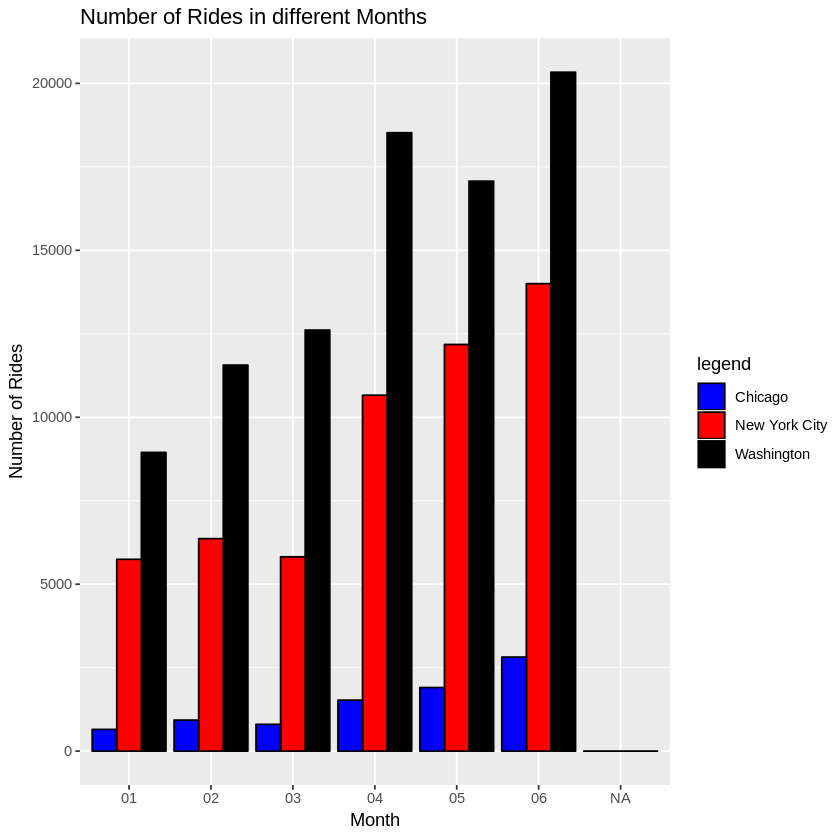

In [42]:
ggplot(aes(x = FormattedMonth, fill = City), data = city) +
    geom_bar(position = 'dodge', colour="black") +
    ggtitle('Number of Rides in different Months') +
    labs(y = 'Number of Rides', x = 'Month') +
    scale_fill_manual("legend", values = c("Chicago" = "blue", "New York City" = "red", "Washington" = "black"))
     

In [48]:
result <- city %>%
  group_by(City, FormattedMonth) %>%
  summarise(UserCount = n(),
            UserPercentage = n() / sum(n()) * 100)
result

City,FormattedMonth,UserCount,UserPercentage
Chicago,01,650,100
Chicago,02,930,100
Chicago,03,803,100
Chicago,04,1526,100
Chicago,05,1905,100
Chicago,06,2816,100
New York City,01,5745,100
New York City,02,6364,100
New York City,03,5820,100
New York City,04,10661,100


In [52]:
most_popular_month <- result %>%
  group_by(City) %>%
  filter(UserCount == max(UserCount))

most_popular_month

City,FormattedMonth,UserCount,UserPercentage
Chicago,06,2816,100
New York City,06,14000,100
Washington,06,20335,100


In [51]:
least_common_month <- result %>%
  group_by(City) %>%
  filter(UserCount == min(UserCount))

least_common_month

City,FormattedMonth,UserCount,UserPercentage
Chicago,01,650,100
New York City,01,5745,100
Washington,NA,1,100


**Summary**
The most popular month across every city is June (6). The least popular month is January (1).  
In Chicago, when it is June there are about 2816 users and when it is January it drops ot 650 users. 
In NYC, when it is June there are about 14000 users, but when it is January it drops to 5745. 
Lastly, in Washinton, when it is June ther eis 20335 users. 
This makes since due to the weather change. When it is in the summer months (6-8), the weather is more bike friendly due to heat and rain patterns. When it is in the winter months (11-2) it is much colder and there are more chances of rain or snow or ice, which will drop the amount of people riding a bike. 

### Question 3

What is the average travel time?

In [53]:
# Count of users in City
total_city = sort(table(city$City))
print(total_city)


      Chicago New York City    Washington 
         8630         54770         89051 


In [54]:
# percentage of users in City
round((total_city / sum(total_city) * 100), digits = 2)


      Chicago New York City    Washington 
         5.66         35.93         58.41 

Warning message:
“Removed 2 rows containing non-finite values (stat_summary).”

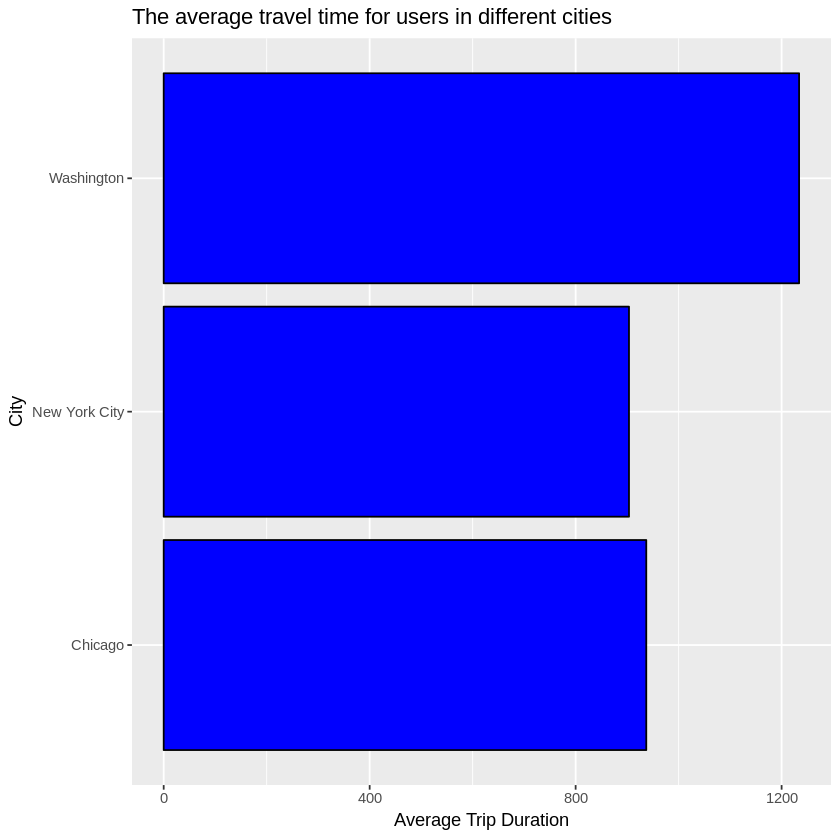

In [55]:
# Visualizing data 
ggplot(aes(x = City, y = Trip.Duration), data = city) +
    geom_bar(position = 'dodge', stat = "summary", fun.y = "mean", fill = "blue", colour="black") + 
    ggtitle('The average travel time for users in different cities') +
    labs(y = 'Average Trip Duration', x = 'City') +
    coord_flip()

In [57]:
city.summary <- with(city, aggregate(list(Trip.Duration), by = list(City), 
                   FUN = function(x) { mon.mean = mean(x, na.rm = TRUE) } ))

colnames(city.summary) <- c('City', 'Average.Trip.Duration')
city.summary

City,Average.Trip.Duration
Chicago,937.1728
New York City,903.6147
Washington,1233.9533


Washinton has the most users out of the three cities, it makes up 58.41% of the users. That is followed by NYC, which makes up 35.93% of the users, and then Chicago with only 5.66% of the users.
The highest trip duration is in Washington with 1233.9533, followed by Chicago with 937.1728 then NYC with 903.6147. 


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [59]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')